In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Thu Apr 27 02:00:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

Name: /physical_device:GPU:0   Type: GPU


In [ ]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
import numpy as np
import cv2
import os
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
images = []
labels = []

In [ ]:
# Load the FVC2000 dataset

train_dir = '/content/drive/MyDrive/Fingerprint/FVC2000_DB4_B/dataset/train_data'
for j in range(0, 10):
    for k in range(0, 80):
        path = '0000' + str(j) + '_';
        if k <= 9:
            path = path + '0';
        path = path + str(k) + '.bmp';
        img_path = os.path.join(train_dir, path)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Error: Failed to read {img_path}")
            continue
        img = cv2.resize(img, (256, 256))
        img = np.expand_dims(img, axis=-1)

        images.append(img)
        labels.append(j)

In [ ]:
images = np.array(images)
labels = np.array(labels)

In [ ]:
# Create a CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
# Train the model
history = model.fit(images, 
                    labels,
                    epochs=30)

Epoch 1/30
25/25 [==============================] - 18s 79ms/step - loss: 2.7958 - accuracy: 0.2050
Epoch 2/30
25/25 [==============================] - 2s 79ms/step - loss: 1.9778 - accuracy: 0.3500
Epoch 3/30
25/25 [==============================] - 2s 79ms/step - loss: 1.3509 - accuracy: 0.5400
Epoch 4/30
25/25 [==============================] - 2s 79ms/step - loss: 0.9137 - accuracy: 0.7063
Epoch 5/30
25/25 [==============================] - 2s 79ms/step - loss: 0.4975 - accuracy: 0.8512
Epoch 6/30
25/25 [==============================] - 2s 79ms/step - loss: 0.2199 - accuracy: 0.9463
Epoch 7/30
25/25 [==============================] - 2s 80ms/step - loss: 0.1299 - accuracy: 0.9688
Epoch 8/30
25/25 [==============================] - 2s 79ms/step - loss: 0.0566 - accuracy: 0.9925
Epoch 9/30
25/25 [==============================] - 2s 79ms/step - loss: 0.0312 - accuracy: 0.9975
Epoch 10/30
25/25 [==============================] - 2s 79ms/step - loss: 0.0190 - accuracy: 0.9987
Epoch 11

In [ ]:
model.save('/content/drive/MyDrive/Fingerprint/FVC2000_DB4_B/CNN_BN.h5')

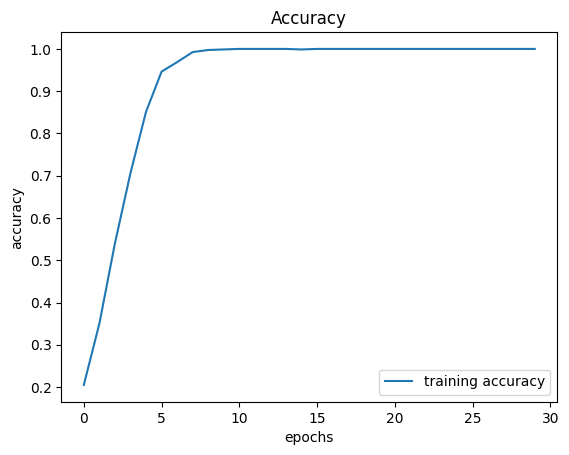

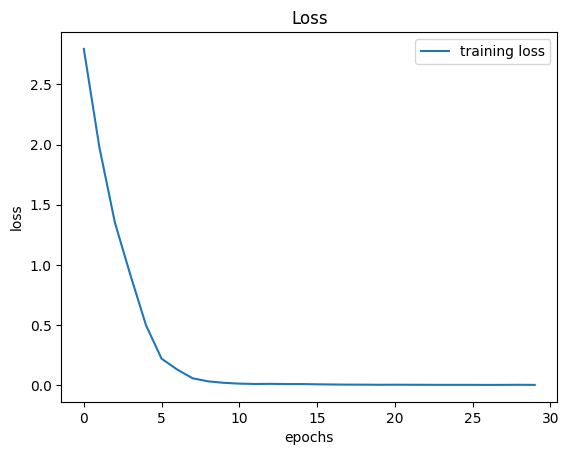

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(images, labels, verbose=0)
print('accuracy:', score[1])

accuracy: 1.0
